In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score
import joblib


In [4]:
# Load dataset
data = pd.read_csv(r"D:\Data Projects\GitHub\Shipment_Tracking\data\label_data_pred_cancel_order.csv")

data['estimated_delivery'] = pd.to_datetime(data['estimated_delivery'])
data['delivery_day'] = data['estimated_delivery'].dt.day
data['delivery_month'] = data['estimated_delivery'].dt.month
data['delivery_year'] = data['estimated_delivery'].dt.year
data['delivery_weekday'] = data['estimated_delivery'].dt.weekday

In [6]:
data.tail(10000)

,tracking_number,origin_id,destination_id,current_location_id,estimated_delivery,days_to_delivery,user_id,status,is_canceled,delivery_day,delivery_month,delivery_year,delivery_weekday
490000,f96a450d-87a1-40bd-8252-1d8870b61483,1027,752,844,2024-12-31,20,140159,Pending,0,31,12,2024,1
490001,94738864-b386-44c9-bd6b-6b54b1a2ee03,746,689,816,2024-12-12,1,236319,Pending,0,12,12,2024,3
490002,f7950157-e5d5-4f40-8628-a1186447e134,590,760,230,2024-12-21,10,210168,Pending,0,21,12,2024,5
490003,262ec4b7-b9e5-473b-95f7-c5d7812e1c5f,917,629,281,2025-01-03,23,221327,Pending,0,3,1,2025,4
490004,97b3cab7-be3b-4c16-b4ba-d3d10b78fc4c,936,982,685,2024-12-09,-2,200498,Pending,0,9,12,2024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,d87047d5-295a-4796-a8a0-538e28b83327,321,832,231,2025-01-03,23,250000,Pending,0,3,1,2025,4
499996,45b7b0f9-c9f3-4dec-88d9-2faa22881290,532,632,741,2024-12-24,13,139165,Pending,0,24,12,2024,1
499997,0da795fa-a87f-42bb-8956-0c36544ead1c,685,840,661,2024-12-10,-1,201449,Pending,0,10,12,2024,1
499998,47000c7c-f2a2-40d3-9f28-6b6c802c4f06,693,274,774,2024-12-22,11,167727,Pending,0,22,12,2024,6


In [20]:

# Features (X) and target (y)
X = data.drop(columns=['tracking_number', 'estimated_delivery', 'is_canceled', 'status'])
y = data['is_canceled']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.74643
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85     75014
           1       0.27      0.01      0.02     24986

    accuracy                           0.75    100000
   macro avg       0.51      0.50      0.44    100000
weighted avg       0.63      0.75      0.65    100000



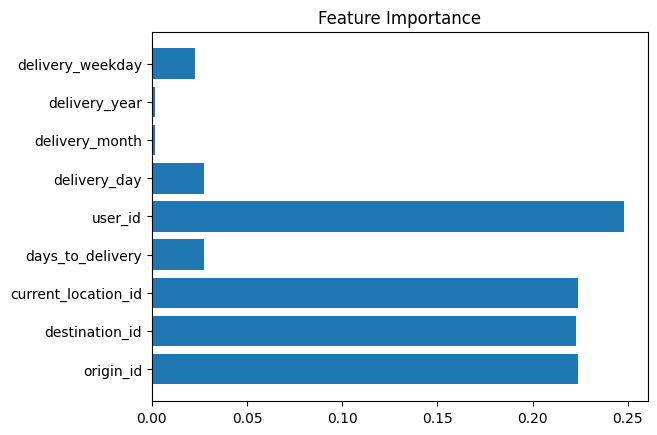

In [24]:
# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.show()


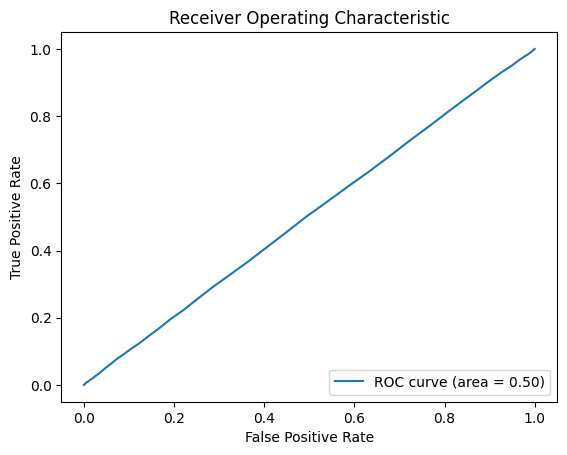

In [25]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import secrets
print(secrets.token_hex(16))
#231b5308a683f661b7efb851945d5131

231b5308a683f661b7efb851945d5131
